# Chicago crime and weather

 First, we'll quickly combine both Crime and Weather data, then we analyse them both side by side and see if there is some correlation between temperature and crime rates.
 

In [ ]:
#Importing packages
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## Reading both datasets 

I've gone through the crimes CSV file (using a decent text editor that doesn't crash on huge files, like Emacs).The rows are very chaotically ordered. Let's see if we can filter through the file, only select the 2016 data and throw away 
the rest (mainly due to memory constraints of the machines people might want to run these examples on). We're gonna use the `iterator` and `chunksize` options of the `read_csv` function (for such slightly more advanced uses see [the docs](http://pandas.pydata.org/pandas-docs/stable/io.html#csv-text-files)).

First lets define the paths globally, so that later we can skip the serialising step.

In [ ]:
crimes_raw_file_path = 'data/chicago_crime/Crimes_-_2001_to_present.csv'
crimes_file_path = 'data/chicago_crime/crimes.csv'

Processing & serialising the crime data

In [ ]:
chunksize = 1000
df_chunks = []

for df in pd.read_csv(
    crimes_raw_file_path, parse_dates=[2], index_col=[2],
    chunksize=chunksize, iterator=True, low_memory=True
):
    df = df['2016-01-01':'2016-12-31']
    df_chunks.append(df)
    
crimes2016 = pd.concat(df_chunks)

# Serialising the data
crimes2016.sort_index(ascending=True).to_csv(crimes_file_path)

crimes2016.head()

ID Case Number                  Block  IUCR  \
Date                                                                     
2016-06-20 09:00:00  10606686    HZ358366    047XX S INDIANA AVE  1562   
2016-11-12 07:30:00  10750326    HZ512286        038XX W 61ST ST  031A   
2016-05-03 21:08:00     22451    HZ250365  074XX S MAPLEWOOD AVE  0110   
2016-05-03 14:00:00     22452    HZ249724      049XX W MONROE ST  0110   
2016-05-04 12:00:00  10509644    HZ251124        005XX E 75TH ST  0890   

                    Primary Type                Description  \
Date                                                          
2016-06-20 09:00:00  SEX OFFENSE  AGG CRIMINAL SEXUAL ABUSE   
2016-11-12 07:30:00      ROBBERY             ARMED: HANDGUN   
2016-05-03 21:08:00     HOMICIDE        FIRST DEGREE MURDER   
2016-05-03 14:00:00     HOMICIDE        FIRST DEGREE MURDER   
2016-05-04 12:00:00        THEFT              FROM BUILDING   

                    Location Description Arrest Domestic  Beat  \
Date                                                             
2016-06-20 09:00:00            RESIDENCE   True    False   224   
2016-11-12 07:30:00             SIDEWALK   True    False   823   
2016-05-03 21:08:00               STREET  False    False   835   
2016-05-03 14:00:00               STREET  False    False  1533   
2016-05-04 12:00:00            RESIDENCE  False    False   323   

                                 ...                Ward  Community Area  \
Date                             ...                                       
2016-06-20 09:00:00              ...                 3.0            38.0   
2016-11-12 07:30:00              ...                13.0            65.0   
2016-05-03 21:08:00              ...                18.0            66.0   
2016-05-03 14:00:00              ...                28.0            25.0   
2016-05-04 12:00:00              ...                 6.0            69.0   

                     FBI Code X Coordinate  Y Coordinate  Year  \
Date                                                             
2016-06-20 09:00:00        17    1178398.0     1873627.0  2016   
2016-11-12 07:30:00        03    1151816.0     1863880.0  2016   
2016-05-03 21:08:00       01A    1160663.0     1855290.0  2016   
2016-05-03 14:00:00       01A    1143598.0     1899211.0  2016   
2016-05-04 12:00:00        06    1181003.0     1855399.0  2016   

                                 Updated On   Latitude  Longitude  \
Date                                                                
2016-06-20 09:00:00  03/01/2018 03:52:35 PM  41.808541 -87.621195   
2016-11-12 07:30:00  03/01/2018 03:52:35 PM  41.782357 -87.718948   
2016-05-03 21:08:00  05/10/2016 03:56:50 PM  41.758606 -87.686749   
2016-05-03 14:00:00  05/10/2016 03:56:50 PM  41.879467 -87.748196   
2016-05-04 12:00:00  02/10/2018 03:50:01 PM  41.758462 -87.612201   

                                          Location  
Date                                                
2016-06-20 09:00:00  (41.808540691, -87.621194998)  
2016-11-12 07:30:00  (41.782356535, -87.718947917)  
2016-05-03 21:08:00  (41.758606301, -87.686748849)  
2016-05-03 14:00:00  (41.879467146, -87.748195577)  
2016-05-04 12:00:00  (41.758461712, -87.612201241)  

[5 rows x 21 columns]

Now we can quickly deserialise the crimes data.

In [ ]:

crimes2016 = pd.read_csv(crimes_file_path, index_col=0, parse_dates=True)
crimes2016.head()

ID Case Number                  Block  IUCR  \
Date                                                            
2016-01-01  10607316    HZ359357    023XX N KIMBALL AVE  0266   
2016-01-01  10496416    HZ237276  018XX W EVERGREEN AVE  1154   
2016-01-01  10419400    HZ157088     064XX S RHODES AVE  1562   
2016-01-01  10501254    HZ240963    005XX N LARAMIE AVE  1752   
2016-01-01  10367959    HZ103735      001XX E WALTON ST  0810   

                          Primary Type  \
Date                                     
2016-01-01         CRIM SEXUAL ASSAULT   
2016-01-01          DECEPTIVE PRACTICE   
2016-01-01                 SEX OFFENSE   
2016-01-01  OFFENSE INVOLVING CHILDREN   
2016-01-01                       THEFT   

                                        Description Location Description  \
Date                                                                       
2016-01-01                                PREDATORY            RESIDENCE   
2016-01-01  FINANCIAL IDENTITY THEFT $300 AND UNDER            APARTMENT   
2016-01-01                AGG CRIMINAL SEXUAL ABUSE            APARTMENT   
2016-01-01            AGG CRIM SEX ABUSE FAM MEMBER            RESIDENCE   
2016-01-01                                OVER $500          HOTEL/MOTEL   

           Arrest Domestic  Beat              ...                Ward  \
Date                                          ...                       
2016-01-01  False     True  1413              ...                35.0   
2016-01-01  False    False  1424              ...                 1.0   
2016-01-01  False     True   312              ...                20.0   
2016-01-01  False    False  1523              ...                28.0   
2016-01-01  False    False  1833              ...                42.0   

            Community Area  FBI Code X Coordinate  Y Coordinate  Year  \
Date                                                                    
2016-01-01            22.0        02    1153320.0     1915322.0  2016   
2016-01-01            24.0        11    1163545.0     1909429.0  2016   
2016-01-01            42.0        17    1181010.0     1862383.0  2016   
2016-01-01            25.0        20    1141611.0     1902863.0  2016   
2016-01-01             8.0        06          NaN           NaN  2016   

                        Updated On   Latitude  Longitude  \
Date                                                       
2016-01-01  02/10/2018 03:50:01 PM  41.923490 -87.712069   
2016-01-01  02/10/2018 03:50:01 PM  41.907110 -87.674665   
2016-01-01  02/10/2018 03:50:01 PM  41.777626 -87.611961   
2016-01-01  02/10/2018 03:50:01 PM  41.889526 -87.755401   
2016-01-01  01/10/2016 08:46:55 AM        NaN        NaN   

                                 Location  
Date                                       
2016-01-01   (41.92348981, -87.712069223)  
2016-01-01  (41.907109594, -87.674665093)  
2016-01-01  (41.777626357, -87.611960915)  
2016-01-01  (41.889525629, -87.755401321)  
2016-01-01                            NaN  

[5 rows x 21 columns]

Awesome! Now that we have the crime data in memory, let's also read the weather data 

In [ ]:
weather_file_path = 'data/chicago_weather/weather.csv'

# parsing weather data and also kicking out some unnecessary 2017 values
weather2016 = pd.read_csv(weather_file_path, index_col=0, parse_dates=True)['2016']
weather2016.temperature.head()

2016-01-01 00:00:00   -4.42
2016-01-01 01:00:00   -5.12
2016-01-01 02:00:00   -5.93
2016-01-01 03:00:00   -6.61
2016-01-01 04:00:00   -6.98
Name: temperature, dtype: float64

## Plotting the data side by side

Let's group both datasets to a daily frequency and plot them side-by-side.

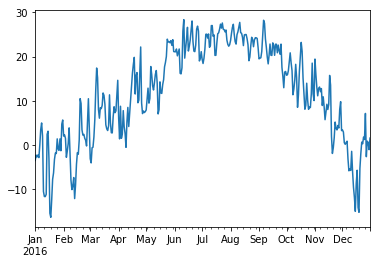

In [ ]:
weather2016.temperature.resample('D').mean().plot()

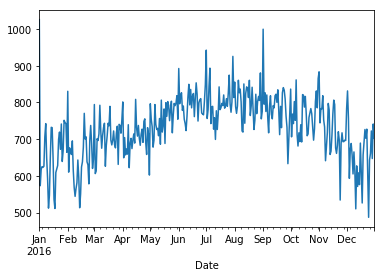

In [ ]:
crimes2016['Primary Type'].resample('D').count().plot()

Let's simplify these variables

In [ ]:
daily_temperature = weather2016.temperature.resample('D').mean()
daily_crimes = crimes2016['Primary Type'].resample('D').count()
daily_crimes.name = 'crimes'

We could plot them on the same graph

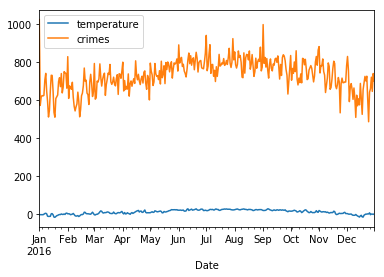

In [ ]:
daily_temperature.plot()
daily_crimes.plot()
plt.legend()

But due to different y-axis dimensions, the data is not very readable (and these types of plots generally aren't recommended if we're plotting different data).

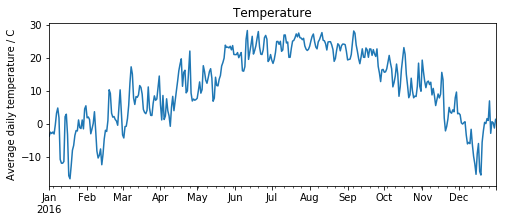

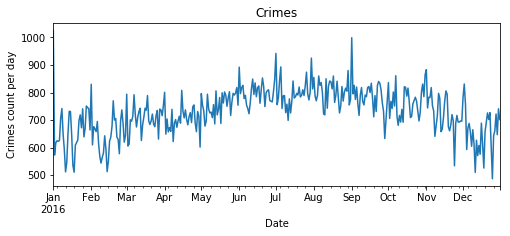

In [ ]:
figsize = (8,3)
plt.figure()
daily_temperature.plot(title='Temperature', figsize=figsize)
plt.ylabel('Average daily temperature / C')
plt.figure()
daily_crimes.plot(title='Crimes', figsize=figsize)
plt.ylabel('Crimes count per day')
plt.show()

We can use a rolling average function to "smoothen" out the curve and see the trend change throught a year.

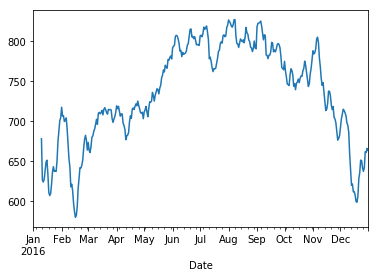

In [ ]:
daily_crimes.rolling(10).mean().plot()

… and why not use our knowledge of interactive widgets to make the moving window size adjustable.

In [ ]:
from ipywidgets import interact, widgets

@interact(periods=widgets.IntSlider(min=10,max=100,step=10,value=50))
def plot_moving_average(periods=50):
    figsize = (8,3)
    plt.figure()
    daily_temperature.rolling(periods).mean().plot(title='Temperature', figsize=figsize)
    plt.ylabel('Average daily temperature / C')
    plt.figure()
    daily_crimes.rolling(periods).mean().plot(title='Crimes', figsize=figsize)
    plt.ylabel('Crimes count per day')
    plt.show()

[link text](https://)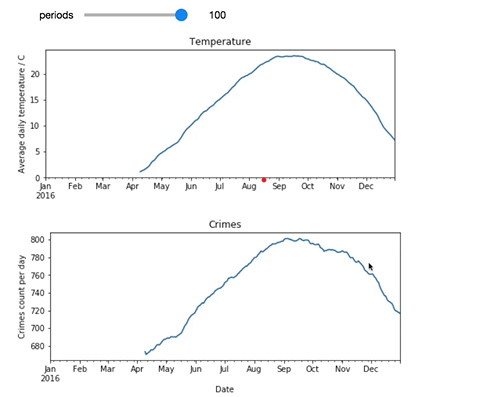

## Computing the correlation

It's easier to visualise and analyse the data correlation if we combine temperatures and crimes into a single DataFrame.

In [ ]:
daily_df = pd.DataFrame({'crimes': daily_crimes, 'temperature': daily_temperature})
daily_df.head()

crimes  temperature
Date                           
2016-01-01    1025    -3.589167
2016-01-02     573    -2.371667
2016-01-03     617    -2.781667
2016-01-04     625    -2.335417
2016-01-05     623    -2.937083

Now we can generate a scatter plot showing both variables as dimensions with a single command.

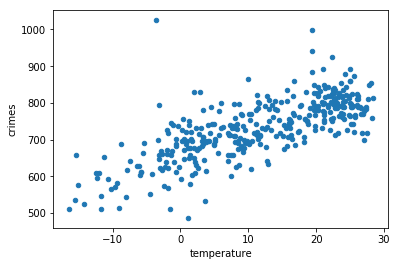

In [ ]:
daily_df.plot(kind='scatter', x='temperature', y='crimes')

This scatter plot pretty cleanly shows that there is some correlation between temperature and the number of crimes. Let's compute it.

In [ ]:
daily_df.corr() # Pearson correlation by default 

crimes  temperature
crimes       1.000000     0.734767
temperature  0.734767     1.000000

The scatter plot also shows some interesting outliers – what's the story with this time the crime rate went over 1000? Let's find out the date…

In [ ]:
daily_df[daily_df.crimes > 1000]

crimes  temperature
Date                           
2016-01-01    1025    -3.589167

OK, it seems that New Year's celebrations can be quite busy for police officers.

### Linear Regression Model

Let's compute a [linear regression model](https://en.wikipedia.org/wiki/Linear_regression) – a funciton of the form $f(x) = ax + b$ that attemts to estimate the crime rate based on temperature. We're gonna use the [StatsModels](https://www.statsmodels.org/dev/index.html) package which includes some useful statistical functions.

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import abline_plot

# regress "crimes" onto "temperature" (plus an intercept)
model = sm.OLS(daily_df.crimes, sm.add_constant(daily_df.temperature))
model_results = model.fit()
print(model_results.params)
print(model_results.summary())

const          669.616570
temperature      5.510943
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 crimes   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     427.1
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           2.49e-63
Time:                        11:39:33   Log-Likelihood:                -1989.6
No. Observations:                 366   AIC:                             3983.
Df Residuals:                     364   BIC:                             3991.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

This model lets us forecast the crime rate based on temperature. Say that the long-term weather forecast says it's gonna be 28 C on average this summer in Chicago (global warming and all that…) and during the winter temperature is going to average 5 C. This is what our models says the crime rate would be for those two seasons – maybe the city of Chicago can plan to adapt the number of police officer patrols accordingly…

In [ ]:
model_results.predict(sm.add_constant(pd.Series([28, 5])))

0    823.922971
1    697.171284
dtype: float64

Of course, take such predictions with a grain of salt – as our scatter plot tells us, there is still quite a lot of 
variance in our data. This is more to show you the different ways we can use linear regression models.

One other neat thing we can do is to illustrate our linear regression model by plotting it over our scatter plot of actual data.

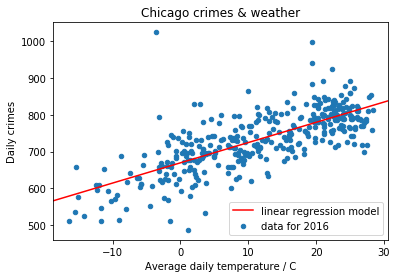

In [ ]:
ax = daily_df.plot(kind='scatter', x='temperature', y='crimes', label='data for 2016')

# plot regression line
abline_plot(model_results=model_results, ax=ax, color='red', label='linear regression model')

plt.title('Chicago crimes & weather')
plt.ylabel('Daily crimes')
plt.xlabel('Average daily temperature / C')
plt.legend()
plt.show()